ՄԵՔԵՆԱՅԱԿԱՆ ՈՒՍՈՒՑՈՒՄ

In [1256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ներմուծենք տվյալների բազմությունը
data = pd.read_csv("ucl_stats.csv")

data

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0


In [1257]:
# տողերի և սյունակների քանակը
data.shape

(714, 11)

In [1258]:
#  տվյալների հավաքածուի յուրաքանչյուր սյան տիպը
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            714 non-null    int64 
 1   team            714 non-null    object
 2   match_played    714 non-null    int64 
 3   wins            714 non-null    int64 
 4   draws           714 non-null    int64 
 5   losts           714 non-null    int64 
 6   goals_scored    714 non-null    int64 
 7   goals_conceded  714 non-null    int64 
 8   gd              714 non-null    int64 
 9   group_point     714 non-null    int64 
 10  champions       714 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 61.5+ KB


In [1259]:
# ըստ սյուների վիճակագրական տվյալներ
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,714.0,2008.711485,7.340121,1993.0,2004.0,2009.0,2015.0,2020.0
match_played,714.0,7.673669,2.100880,6.0,6.0,6.0,8.0,13.0
wins,714.0,2.939776,2.316600,0.0,1.0,2.0,4.0,11.0
draws,714.0,1.844538,1.273169,0.0,1.0,2.0,3.0,7.0
losts,714.0,2.892157,1.234552,0.0,2.0,3.0,4.0,6.0
goals_scored,714.0,10.582633,6.979194,0.0,5.0,9.0,14.0,43.0
goals_conceded,714.0,10.443978,3.634080,2.0,8.0,10.0,13.0,24.0
gd,714.0,0.198880,7.573646,-22.0,-5.0,0.0,5.0,35.0
group_point,714.0,8.183473,4.192922,-8.0,5.0,8.0,11.0,18.0
champions,714.0,0.039216,0.194244,0.0,0.0,0.0,0.0,1.0


In [1260]:
# սյուների միջև կոորելացիան (կոորելացիոն մատրից)
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
correlation_matrix

,year,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
year,1.000000,0.059916,0.049125,-0.079546,0.085247,0.118575,0.221224,0.003506,0.046656,-0.060912
match_played,0.059916,1.000000,0.881810,0.354870,-0.332092,0.832264,0.046375,0.738255,0.701316,0.399148
wins,0.049125,0.881810,1.000000,0.111423,-0.491203,0.881527,-0.138426,0.870092,0.864891,0.404209
draws,-0.079546,0.354870,0.111423,1.000000,-0.625482,0.212875,-0.183612,0.282042,0.212118,0.155125
losts,0.085247,-0.332092,-0.491203,-0.625482,1.000000,-0.463614,0.526186,-0.672411,-0.649967,-0.257225
goals_scored,0.118575,0.832264,0.881527,0.212875,-0.463614,1.000000,0.075775,0.873077,0.764339,0.396949
goals_conceded,0.221224,0.046375,-0.138426,-0.183612,0.526186,0.075775,1.000000,-0.391359,-0.285354,-0.048542
gd,0.003506,0.738255,0.870092,0.282042,-0.672411,0.873077,-0.391359,1.000000,0.831159,0.387477
group_point,0.046656,0.701316,0.864891,0.212118,-0.649967,0.764339,-0.285354,0.831159,1.000000,0.206410
champions,-0.060912,0.399148,0.404209,0.155125,-0.257225,0.396949,-0.048542,0.387477,0.206410,1.000000


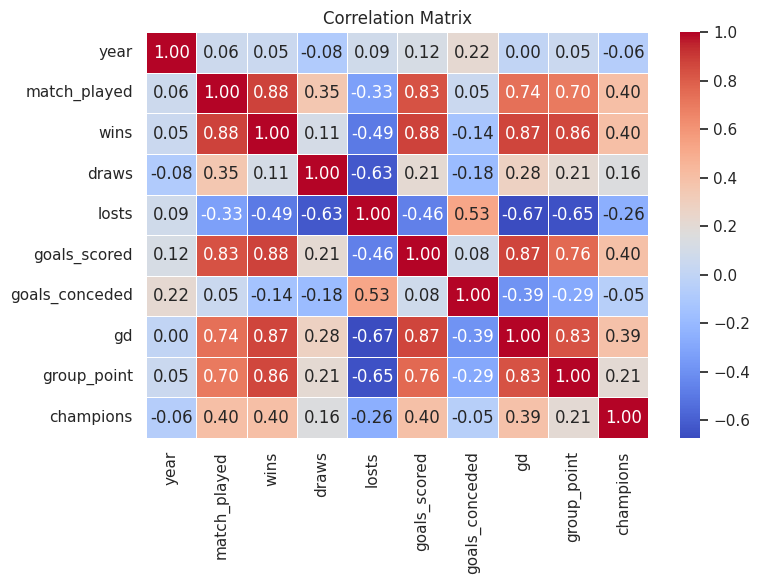

In [1261]:
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

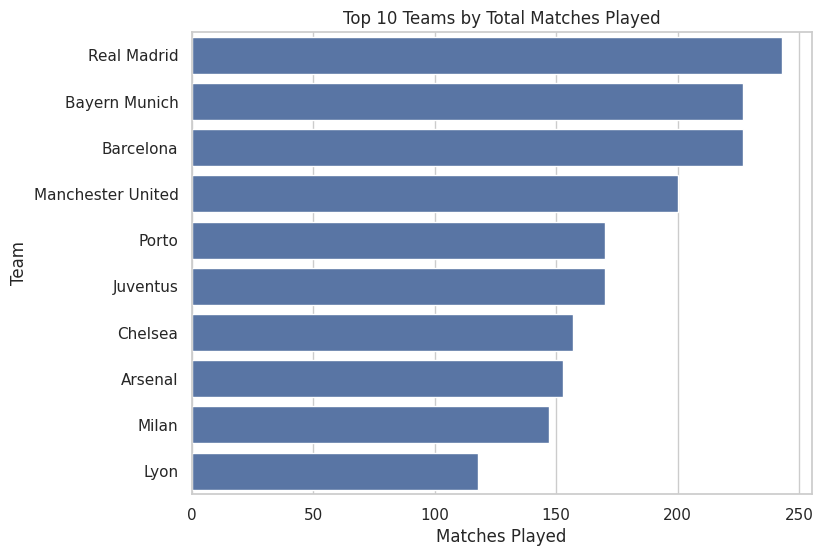

In [1262]:
# top 10 ամենաշատ խաղեր անցկացրած թիմերը
top_teams = data.groupby("team")["match_played"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title("Top 10 Teams by Total Matches Played")
plt.xlabel("Matches Played")
plt.ylabel("Team")
plt.show()

In [1263]:
# ըստ սյուների բացակայող արժեքների քանակը
data.isna().sum()

,0
year,0
team,0
match_played,0
wins,0
draws,0
losts,0
goals_scored,0
goals_conceded,0
gd,0
group_point,0


In [1264]:
# կրկնությունների քանակը
duplicates = data[data.duplicated()]
print("Number of duplicates: ", len(duplicates))

Number of duplicates:  0


In [1265]:
# հեռացնենք սյունակի արժեքների սկզբում և վերջում գտնվող բացատները
data['team'] = data['team'].str.strip()

In [1266]:
# ստուգենք արդյո՞ք անհամաձայնություններ կան մեր տվյալներում
def fix_inconsistencies(data):

    # համոզվենք, որ matches played = wins + draws + losses
    data = data[data['wins'] + data['draws'] + data['losts'] == data['match_played']]

    # համոզվենք, որ Goal Diff = Goals For - Goals Against
    data = data[data['goals_scored'] - data['goals_conceded'] == data['gd']]

    return data

cleaned_df = fix_inconsistencies(data.copy()) # օգտագործենք կրկնօրինակը նախնական տվյալները չփոփոխելու նպատակով
cleaned_df

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0


In [1267]:
# որոշ սյուների անունները փոխենք, ավելի հասկանալի դարձնելու համար
df = cleaned_df
df = df.rename(columns={'match_played': 'matches_played', 'losts': 'losses', 'gd': 'goal_diff'})
df.head()

,year,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0


In [1268]:
# հեռացնենք "year" սյունակը, քանի որ հետագա վերլուծության համար անհրաժեշտ չէ
df.drop(['year'], axis = 1, inplace = True)
df

,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions
0,Marseille,6,3,3,0,14,4,10,9,1
1,Milan,7,6,0,1,11,2,9,12,0
2,Rangers,6,2,4,0,7,5,2,8,0
3,Club Brugge,6,2,1,3,5,8,-3,5,0
4,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...
709,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,Valencia,8,3,2,3,13,15,-2,11,0
711,Chelsea,8,3,2,3,12,16,-4,11,0
712,Ajax,6,3,1,2,12,6,6,10,0


In [1269]:
# նոր հատկանիշների ստեղծում
leagues = {
    "LaLiga": ["Barcelona", "Real Madrid", "Atletico Madrid", "Valencia", "Deportivo La Coruna", "Real Sociedad", "Celta Vigo", "Villarreal", "Real Betis", "Sevilla", "Malaga" ],
    "Premier": ["Manchester United", "Blackburn Rovers", "Newcastle United", "Chelsea", "Leeds United", "Liverpool", "Tottenham Hotspur", "Manchester City", "Leicester City"],
    "Bundesliga": ["Werder Bremen", "Bayern Munich", "Borussia Dortmund", "Bayer Leverkusen", "Hertha BSC", "Stuttgart", "Schalke 04", "Hamburg", "Wolfsburg", "Borussia Monchengladbach", "RB Leipzig", "1899 Hoffenheim"],
    "Ligue1": ["Marseille", "Monaco", "Paris Saint-Germain", "Nantes", "Auxerre", "Bordeaux", "Lyon", "Lille", "Montpellier"],
    "SerieA": ["Milan", "Juventus", "Parma", "Fiorentina", "Lazio", "Roma", "Udinese", "Napoli", "Inter Milan", "Atalanta"],
    "Misc": ["Rangers", "Club Brugge", "CSKA Moscow", "IFK Goteborg", "Porto", "PSV Eindhoven", "Spartak Moscow", "Galatasaray", "Anderlecht", "Dynamo Kyiv", "Steaua Bucure?ti", "Casino Salzburg", "AEK Athens", "Benfica", "Hajduk Split", "Ajax", "Panathinaikos", "Aalborg BK", "Legia Warsaw", "Rosenborg", "Ferencvaros", "Grasshopper", "Rapid Wien", "Sparta Prague", "Feyenoord", "Olympiacos", "Besiktas", "Sporting CP", "Lierse", "Croatia Zagreb", "Sturm Graz", "HJK", "Boavista", "Lokomotiv Moscow", "Basel", "Celtic", "Partizan", "Maccabi Tel Aviv", "Fenerbahce", "Shakhtar Donetsk", "Thun", "Artmedia", "Levski Sofia", "Copenhagen", "Be?ikta?", "Slavia Prague", "CFR Cluj", "Anorthosis", "PSV", "Zenit Saint Petersburg", "BATE Borisov", "Maccabi Haifa", "Zurich", "APOEL", "Debrecen", "Rubin Kazan", "Unirea Urziceni", "Standard Liege", "AZ", "Twente", "Hapoel Tel Aviv", "Bursaspor", "Braga", "Trabzonspor", "O?elul Gala?i", "Dinamo Zagreb", "Genk", "Viktoria Plze?", "Nordsjaelland", "Austria Wien", "Ludogorets Razgrad", "Maribor", "Astana", "Gent", "Be?ikta?", "Rostov", "Qaraba?", "Red Star Belgrade", "Young Boys", "Red Bull Salzburg"],
}

df['league'] = ''

for league, teams in leagues.items():
    df.loc[df['team'].isin(teams), 'league'] = league


df['Win_Ratio'] = (df['wins']) / df['matches_played']
df['Loss_Ratio'] = (df['losses']) / df['matches_played']
df['GoalsScored_to_Matches'] = (df['goals_scored']) / df['matches_played']
df['GoalsConceeded_to_Matches'] = (df['goals_conceded']) / df['matches_played']
df['Win_to_Loss'] = (df['wins']) / (df['losses'] + 1)
df['Wins_to_GoalsScored'] = (df['wins']) / (df['goals_scored'] + 1)
df['GoalsScored_GoalsConceded'] = (df['goals_scored'] - df['goals_conceded'])

df

,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions,league,Win_Ratio,Loss_Ratio,GoalsScored_to_Matches,GoalsConceeded_to_Matches,Win_to_Loss,Wins_to_GoalsScored,GoalsScored_GoalsConceded
0,Marseille,6,3,3,0,14,4,10,9,1,Ligue1,0.500000,0.000000,2.333333,0.666667,3.00,0.200000,10
1,Milan,7,6,0,1,11,2,9,12,0,SerieA,0.857143,0.142857,1.571429,0.285714,3.00,0.500000,9
2,Rangers,6,2,4,0,7,5,2,8,0,Misc,0.333333,0.000000,1.166667,0.833333,2.00,0.250000,2
3,Club Brugge,6,2,1,3,5,8,-3,5,0,Misc,0.333333,0.500000,0.833333,1.333333,0.50,0.333333,-3
4,CSKA Moscow,6,0,2,4,2,11,-9,2,0,Misc,0.000000,0.666667,0.333333,1.833333,0.00,0.000000,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0,Misc,0.333333,0.500000,1.166667,1.500000,0.50,0.250000,-2
710,Valencia,8,3,2,3,13,15,-2,11,0,LaLiga,0.375000,0.375000,1.625000,1.875000,0.75,0.214286,-2
711,Chelsea,8,3,2,3,12,16,-4,11,0,Premier,0.375000,0.375000,1.500000,2.000000,0.75,0.230769,-4
712,Ajax,6,3,1,2,12,6,6,10,0,Misc,0.500000,0.333333,2.000000,1.000000,1.00,0.230769,6


In [1270]:
# կատեգորիական տվյալները («team», «league») փոխենք այնպես, որ հնարավոր լինի փոխանցել մեքենայական ուսուցման մոդելին

df['team'] = df['team'].astype('category').cat.codes
df['league'] = df['league'].astype('category').cat.codes

team_map = dict(enumerate(df['team'].astype('category').cat.categories))
league_map = dict(enumerate(df['league'].astype('category').cat.categories))

df

,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions,league,Win_Ratio,Loss_Ratio,GoalsScored_to_Matches,GoalsConceeded_to_Matches,Win_to_Loss,Wins_to_GoalsScored,GoalsScored_GoalsConceded
0,82,6,3,3,0,14,4,10,9,1,3,0.500000,0.000000,2.333333,0.666667,3.00,0.200000,10
1,83,7,6,0,1,11,2,9,12,0,6,0.857143,0.142857,1.571429,0.285714,3.00,0.500000,9
2,101,6,2,4,0,7,5,2,8,0,4,0.333333,0.000000,1.166667,0.833333,2.00,0.250000,2
3,38,6,2,1,3,5,8,-3,5,0,4,0.333333,0.500000,0.833333,1.333333,0.50,0.333333,-3
4,33,6,0,2,4,2,11,-9,2,0,4,0.000000,0.666667,0.333333,1.833333,0.00,0.000000,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,135,6,2,1,3,7,9,-2,7,0,4,0.333333,0.500000,1.166667,1.500000,0.50,0.250000,-2
710,129,8,3,2,3,13,15,-2,11,0,2,0.375000,0.375000,1.625000,1.875000,0.75,0.214286,-2
711,37,8,3,2,3,12,16,-4,11,0,5,0.375000,0.375000,1.500000,2.000000,0.75,0.230769,-4
712,5,6,3,1,2,12,6,6,10,0,4,0.500000,0.333333,2.000000,1.000000,1.00,0.230769,6


In [1271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 0 to 713
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team                       685 non-null    int16  
 1   matches_played             685 non-null    int64  
 2   wins                       685 non-null    int64  
 3   draws                      685 non-null    int64  
 4   losses                     685 non-null    int64  
 5   goals_scored               685 non-null    int64  
 6   goals_conceded             685 non-null    int64  
 7   goal_diff                  685 non-null    int64  
 8   group_point                685 non-null    int64  
 9   champions                  685 non-null    int64  
 10  league                     685 non-null    int8   
 11  Win_Ratio                  685 non-null    float64
 12  Loss_Ratio                 685 non-null    float64
 13  GoalsScored_to_Matches     685 non-null    float64
 14 

In [1272]:
# Cross Validation: Train/Test Split (տվյալների բազմությունը բաժանենք 70%-անոց train և 30%-անող test մասերի)
from sklearn.model_selection import train_test_split
RANDOM_SEED = 2026
X = df.drop("champions", axis=1)
y = df['champions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = RANDOM_SEED, stratify=y)

In [1273]:
# տվյաների նորմավորում
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train)

In [1274]:
# ստեղծենք PCA օբյեկտ՝ 16 կոմպոնենտով
from sklearn.decomposition import PCA

pca_test = PCA(n_components=16)
pca_test.fit(X_train_scaled)

PCA(n_components=16)

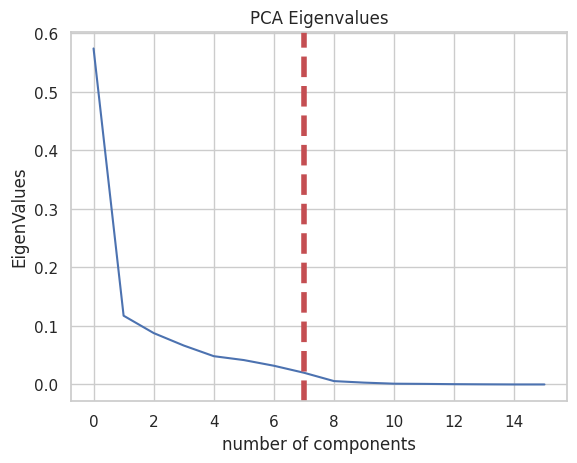

None

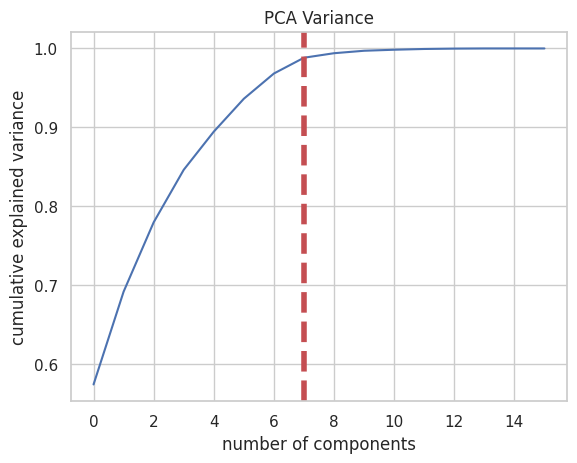

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.574371,0.574371
1,0.691897,0.117525
2,0.779749,0.087853
3,0.846302,0.066552
4,0.894622,0.048320
5,0.936294,0.041672
6,0.968258,0.031964


In [1275]:
# Eigenvalues Plot (Elbow graph)
sns.set(style='whitegrid')
plt.plot(pca_test.explained_variance_ratio_)
plt.title("PCA Eigenvalues")
plt.xlabel('number of components')
plt.ylabel('EigenValues')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=7, ymin=0, ymax=1)
display(plt.show())

# Variance Plot
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.title("PCA Variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=7, ymin=0, ymax=1)
display(plt.show())

# Make table for the graph
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(7))

PCA վերլուծությունը ցույց տվեց, որ 7 հիմնական կոմպոնենտները բավարար են պահպանելու տվյալների շուրջ 85-90% փոփոխականությունը:
Այս փաստը հնարավորություն է տալիս նվազեցնել կոմպոնենտների քանակը՝ առանց զգալի տեղեկատվության կորուստի:
Հետևաբար, հետագա վերլուծություններում կօգտագործվեն 7 կոմպոնենտներ:

In [1276]:
pca = PCA(n_components=7)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


In [1277]:
# Մոդելի գործակիցները
print("Ազատ անդամ (Intercept):", log_reg.intercept_)
print("Գործակիցներ (Coefficients):")
for i, coef in enumerate(log_reg.coef_[0]):
    print(f"Բաղադրիչ {i + 1}: {coef}")

Ազատ անդամ (Intercept): [-8.58680672]
Գործակիցներ (Coefficients):
Բաղադրիչ 1: 1.0592156146611904
Բաղադրիչ 2: 1.9343092304034917
Բաղադրիչ 3: -0.5370355978668202
Բաղադրիչ 4: 0.7572371530370351
Բաղադրիչ 5: 0.3486812574892557
Բաղադրիչ 6: -0.06457479348503121
Բաղադրիչ 7: 1.5808341743265248


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       198
           1       0.25      1.00      0.40         8

    accuracy                           0.88       206
   macro avg       0.62      0.94      0.67       206
weighted avg       0.97      0.88      0.91       206



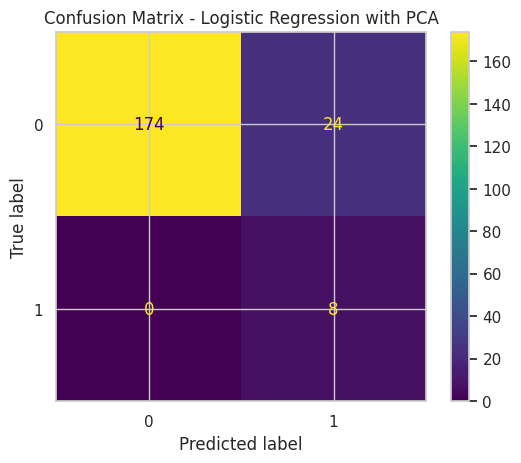

In [1278]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# կիրառենք լոգիստիկ ռոգրեսիա
log_reg = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED, class_weight='balanced')
log_reg.fit(X_train_scaled_pca, y_train)

# կանխագուշակենք test տվյալների համար
y_pred = log_reg.predict(X_test_scaled_pca)

# գնահատենք մոդելի որակը
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix - Logistic Regression with PCA")
plt.show()


In [1279]:
import pandas as pd

# ներմուծենք CSV ֆայլը
data1 = pd.read_csv('AllTimeRankingByClub.csv', encoding='utf-16')

# պահպանենք միայն անհրաժեշտ թիմերը, որոնք մասնակցել են խմբային փուլին
teams = [
        "Real Madrid CF", "FC Barcelona", "Club Atlético de Madrid", "Villarreal CF", "Athletic Club", "Liverpool FC", "Chelsea FC", "Arsenal FC", "Manchester City FC",
        "Tottenham Hotspur", "Newcastle United FC",  "FC Bayern München", "Eintracht Frankfurt", "Paris Saint-Germain", "AS Monaco FC", "Olympique de Marseille",
        "Juventus", "FC Internazionale Milano", "SSC Napoli", "Atalanta BC", "AFC Ajax", "PSV Eindhoven", "Sporting Clube de Portugal", "Olympiacos FC", "SK Slavia Praha",

   ]
test = data1[data1['Club'].isin(teams)].copy()
test.head()

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,53,14,476,285,81,110,1047,521.0,651.0,526.0
1,2,FC Bayern München,GER,39,6,382,229,76,77,804,373.0,534.0,431.0
2,3,FC Barcelona,ESP,33,5,339,197,76,66,667,343.0,470.0,324.0
4,5,Juventus,ITA,37,2,301,153,70,78,479,301.0,376.0,178.0
5,6,Liverpool FC,ENG,27,6,248,142,50,56,472,228.0,334.0,244.0


In [1280]:
# բոլոր թիմերին համապատասխանեցնենք իրենց ազգային լիգաները
leagues = {
    "LaLiga": ["Real Madrid CF", "FC Barcelona", "Club Atlético de Madrid", "Villarreal CF", "Athletic Club" ],
    "Premier": ["Liverpool FC", "Chelsea FC", "Arsenal FC", "Manchester City FC", "Tottenham Hotspur", "Newcastle United FC"],
    "Bundesliga": [ "FC Bayern München", "Eintracht Frankfurt"],
    "Ligue1": ["Paris Saint-Germain", "AS Monaco FC", "Olympique de Marseille"],
    "SerieA": [ "Juventus",  "FC Internazionale Milano",  "SSC Napoli",  "Atalanta BC"],
    "Misc": ["AFC Ajax", "PSV Eindhoven", "Sporting Clube de Portugal", "Olympiacos FC", "SK Slavia Praha"],
}

test['league'] = ''

for league, teams in leagues.items():
    test.loc[test['Club'].isin(teams), 'league'] = league

test


,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff,league
0,1,Real Madrid CF,ESP,53,14,476,285,81,110,1047,521.0,651.0,526.0,LaLiga
1,2,FC Bayern München,GER,39,6,382,229,76,77,804,373.0,534.0,431.0,Bundesliga
2,3,FC Barcelona,ESP,33,5,339,197,76,66,667,343.0,470.0,324.0,LaLiga
4,5,Juventus,ITA,37,2,301,153,70,78,479,301.0,376.0,178.0,SerieA
5,6,Liverpool FC,ENG,27,6,248,142,50,56,472,228.0,334.0,244.0,Premier
9,10,AFC Ajax,NED,39,4,247,112,64,71,396,282.0,288.0,114.0,Misc
11,12,Chelsea FC,ENG,19,2,201,104,53,44,342,181.0,261.0,161.0,Premier
12,13,FC Internazionale Milano,ITA,24,3,205,98,54,53,290,204.0,250.0,86.0,SerieA
13,14,Arsenal FC,ENG,21,0,201,101,43,57,332,218.0,245.0,114.0,Premier
16,17,Club Atlético de Madrid,ESP,18,0,160,76,42,42,226,152.0,194.0,74.0,LaLiga


In [1281]:
# սյուները վերածենք թվային արժեքների, որ մոդելները կարողանան օգտագործել
club_mapping = dict(enumerate(test['Club'].astype('category').cat.categories))
league_mapping = dict(enumerate(test['league'].astype('category').cat.categories))

# պահպանենք համապատասխանությունները
test['Club'] = test['Club'].astype('category').cat.codes
test['league'] = test['league'].astype('category').cat.codes

test

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff,league
0,1,19,ESP,53,14,476,285,81,110,1047,521.0,651.0,526.0,1
1,2,9,GER,39,6,382,229,76,77,804,373.0,534.0,431.0,0
2,3,8,ESP,33,5,339,197,76,66,667,343.0,470.0,324.0,1
4,5,11,ITA,37,2,301,153,70,78,479,301.0,376.0,178.0,5
5,6,12,ENG,27,6,248,142,50,56,472,228.0,334.0,244.0,4
9,10,0,NED,39,4,247,112,64,71,396,282.0,288.0,114.0,3
11,12,5,ENG,19,2,201,104,53,44,342,181.0,261.0,161.0,4
12,13,10,ITA,24,3,205,98,54,53,290,204.0,250.0,86.0,5
13,14,2,ENG,21,0,201,101,43,57,332,218.0,245.0,114.0,4
16,17,6,ESP,18,0,160,76,42,42,226,152.0,194.0,74.0,1


In [1282]:
# անվանափոխենք կամ հեռացնենք անհրաժեշտ սյուները
test = test.rename(columns={'Club': 'team', 'Draw': 'draws', 'Participated': 'matches_played', 'Win': 'wins', 'Loss': 'losses', 'Goals For': 'goals_scored', 'Goals Against' : 'goals_conceded', 'Goal Diff': 'goal_diff', 'Pts': 'group_point'})
test.drop(['Position', 'Played', 'Country', 'Titles'], axis = 1, inplace = True)
test.head()

,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,group_point,goal_diff,league
0,19,53,285,81,110,1047,521.0,651.0,526.0,1
1,9,39,229,76,77,804,373.0,534.0,431.0,0
2,8,33,197,76,66,667,343.0,470.0,324.0,1
4,11,37,153,70,78,479,301.0,376.0,178.0,5
5,12,27,142,50,56,472,228.0,334.0,244.0,4


In [1283]:
# ավելացնենք մի քանի հարաբերական արժեքներ
test['Win_Ratio'] = (test['wins']) / test['matches_played']
test['Loss_Ratio'] = (test['losses']) / test['matches_played']
test['GoalsScored_to_Matches'] = (test['goals_scored']) / test['matches_played']
test['GoalsConceeded_to_Matches'] = (test['goals_conceded']) / test['matches_played']
test['Win_to_Loss'] = (test['wins']) / (test['losses'] + 1)
test['Wins_to_GoalsScored'] = (test['wins']) / (test['goals_scored'] + 1)
test['GoalsScored_GoalsConceded'] = (test['goals_scored'] - test['goals_conceded']) + 0.1
test.head()


,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,group_point,goal_diff,league,Win_Ratio,Loss_Ratio,GoalsScored_to_Matches,GoalsConceeded_to_Matches,Win_to_Loss,Wins_to_GoalsScored,GoalsScored_GoalsConceded
0,19,53,285,81,110,1047,521.0,651.0,526.0,1,5.377358,2.075472,19.754717,9.830189,2.567568,0.271947,526.1
1,9,39,229,76,77,804,373.0,534.0,431.0,0,5.871795,1.974359,20.615385,9.564103,2.935897,0.284472,431.1
2,8,33,197,76,66,667,343.0,470.0,324.0,1,5.969697,2.000000,20.212121,10.393939,2.940299,0.294910,324.1
4,11,37,153,70,78,479,301.0,376.0,178.0,5,4.135135,2.108108,12.945946,8.135135,1.936709,0.318750,178.1
5,12,27,142,50,56,472,228.0,334.0,244.0,4,5.259259,2.074074,17.481481,8.444444,2.491228,0.300211,244.1


In [1284]:
# նրոմավորենք արժեքները
scaler = StandardScaler()
scaled_features = scaler.fit_transform(test)
test_pca = pca.transform(scaled_features)

In [1285]:
# կատարենք կանխատեսում և տեսնենք թե որ թիմն է առավել հավանական որ հաղթի UCL 2024-ը
y_pred_test = log_reg.predict(test_pca)
y_proba_test = log_reg.predict_proba(test_pca)[:, 1]

test['predicted_champion'] = y_pred_test
test['champion_probability'] = y_proba_test
winner_index = test['champion_probability'].idxmax()
test['predicted_champion'] = 0
test.loc[winner_index, 'predicted_champion'] = 1

test['Club_name'] = test['team'].map(club_mapping)

ucl_2024_winner = 'Real Madrid CF'
test['champion'] = test['Club_name'].apply(lambda club: 1 if club == ucl_2024_winner else 0)

final_result = test.sort_values(by='champion_probability', ascending=False).head(5)
print(final_result[['Club_name', 'champion_probability', 'predicted_champion', 'champion']])

           Club_name  champion_probability  predicted_champion  champion
0     Real Madrid CF              0.987955                   1         1
1  FC Bayern München              0.841641                   0         0
2       FC Barcelona              0.517765                   0         0
4           Juventus              0.243688                   0         0
5       Liverpool FC              0.215782                   0         0


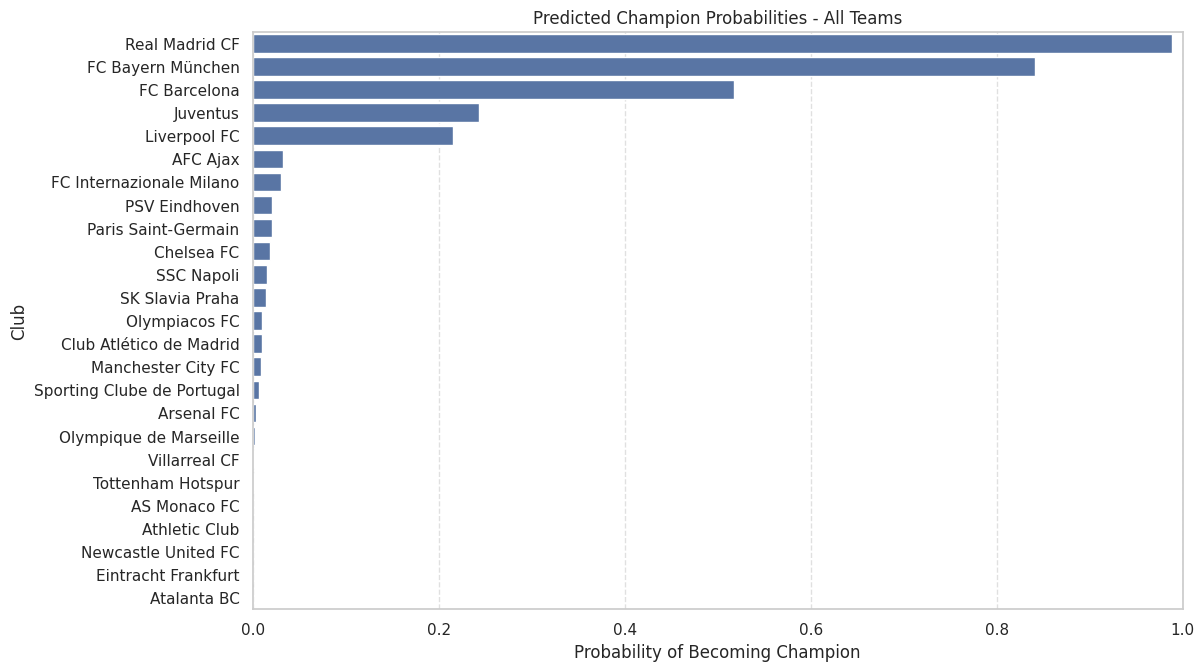

In [1286]:
# նայենք գրաֆիկորեն
import matplotlib.pyplot as plt
import seaborn as sns

test['Club_name'] = test['team'].map(club_mapping)
test_sorted = test.sort_values(by='champion_probability', ascending=False)

plt.figure(figsize=(12, max(6, len(test_sorted) * 0.3)))
sns.barplot(data=test_sorted, x='champion_probability', y='Club_name')

plt.xlabel('Probability of Becoming Champion')
plt.ylabel('Club')
plt.title('Predicted Champion Probabilities - All Teams')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()